# Final Results

Based on the F1 scores, Feature Set 3 did better than any other feature set.
We calculated the accuracy scores as well. However for this type of dataset it is a not a good score
to look at to evaluate our model. 

We will now test our best modesl (DT - Feature Set 3) and (LR - Feature Set 3) with the 2018-2019 statistics and analyze the results. Note that this data was not included to train and test the model.

In [6]:
import pandas as pd 
import numpy as np 

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns
import statistics

# import graphviz
import pydotplus
import io
from scipy import misc

%matplotlib inline

In [7]:
%store -r master
%store -r feature_set_1
%store -r feature_set_2
%store -r feature_set_3
%store -r last_season_data

In [8]:
#Function that generates the decision tree visualizations
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = plt.imread(path)
    plt.rcParams['figure.figsize'] = (20,20)
    plt.imshow(img)

In [9]:
# Initialize the models
dt_model = DecisionTreeClassifier(min_samples_split=100)
lr_model = LogisticRegression()

In [10]:
# Set X as features data (remove class variable and player name)
feature_set_3 = feature_set_3.dropna()
X_train = feature_set_3.drop('MIP',axis=1).drop('Player', axis=1)
feature_names1 = list(X_train.columns)
#Set Y as target class
Y_train = feature_set_3.MIP

In [105]:
# Set X_test and Y_test as the data from 2018-2019
X_test_names = last_season_data.Player
rows = X_test_names.size
X_test = last_season_data.drop('MIP',axis=1).drop('Player', axis=1)
Y_test = last_season_data.MIP
rows

206

In [90]:
# Fit DT to training dataset
dt = dt_model.fit(X_train, Y_train)
# Fit LR to training dataset
lr = lr_model.fit(X_train, Y_train)

/Users/Zoe/scikit-learn/sklearn/linear_model/_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


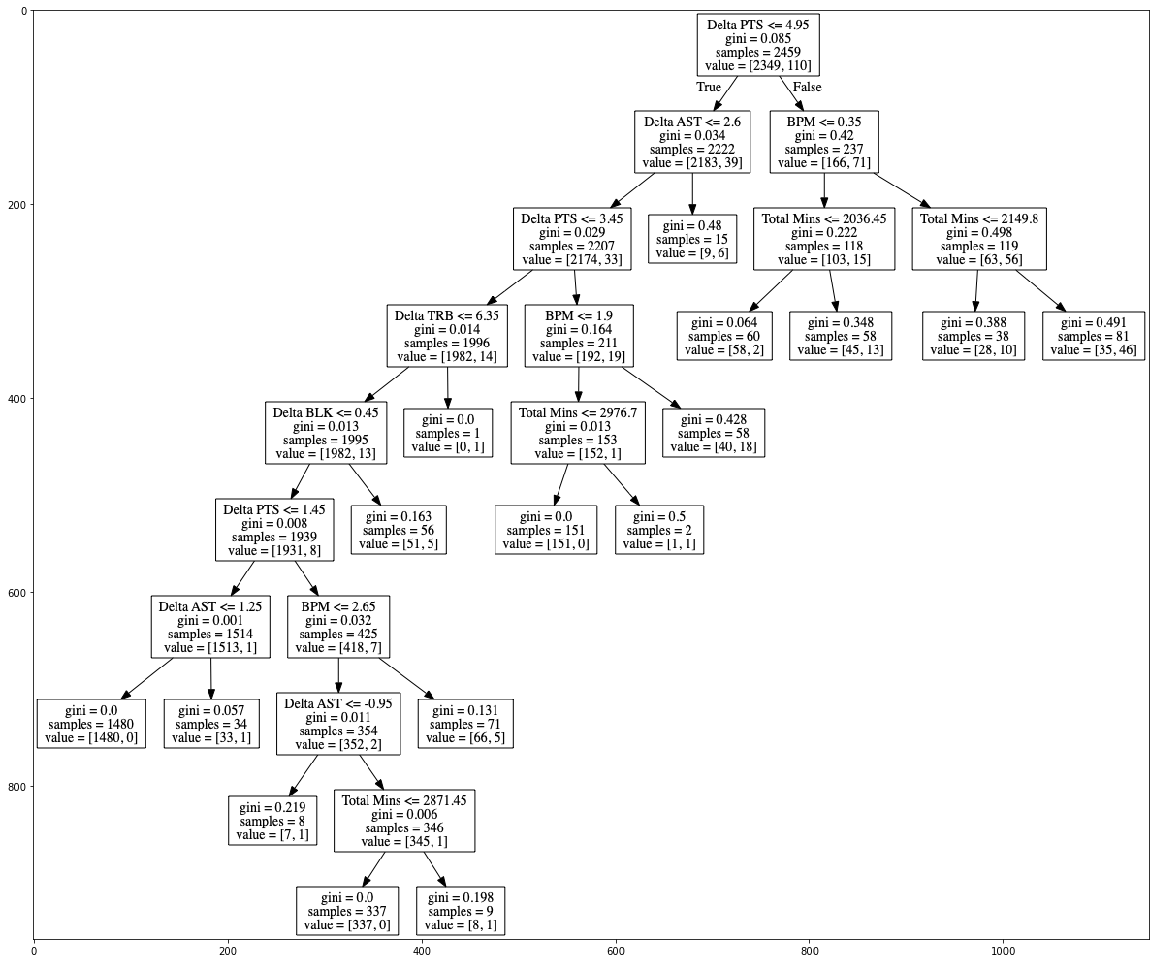

In [91]:
show_tree(dt,feature_names1,'Decision_Tree_1')

In [92]:
# Calculate predictions
dt_predictions = dt.predict(X_test)
lr_predictions = lr.predict(X_test)

In [162]:
#empty dataframe to store the class predictions
predictions = pd.DataFrame()
predictions['Player'] = last_season_data['Player']
predictions['DT Predictions'] = "Nothing"
predictions['LR Predictions'] = "Nothing"

In [157]:
j = 1
print("Rows:", rows)
for j in range(0,206):
    predictions.iloc[j, 1] = dt_predictions[j]
    predictions.iloc[j, 2] = lr_predictions[j]

Rows: 206


## DT Results: 2018-2019 Season

In [158]:
DT_MIPs = predictions[predictions['DT Predictions']==1].drop('LR Predictions', axis=1)
DT_MIPs

,Player,DT Predictions
5523,De'Aaron Fox\foxde01,1
5532,Paul George\georgpa01,1
5553,James Harden\hardeja01,1
5555,Montrezl Harrell\harremo01,1
5569,Buddy Hield\hieldbu01,1
5726,Julius Randle\randlju01,1
5742,D'Angelo Russell\russeda01,1
5750,Pascal Siakam\siakapa01,1


## LR Results: 2018-2019 Season

In [161]:
LR_MIPs = predictions[predictions['LR Predictions']==1].drop('DT Predictions', axis=1)
LR_MIPs

,Player,LR Predictions
5450,Thomas Bryant\bryanth01,1
5523,De'Aaron Fox\foxde01,1
5750,Pascal Siakam\siakapa01,1
